In [1]:
# Basic data manipulation
import pandas as pd
import numpy as np
import joblib
import os
import json

# Data visualization
import matplotlib.pyplot as plt
# Plotting Predicted vs Actual values
def plot_predicted_vs_actual(y_true, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, edgecolor='k', alpha=0.7)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

def plot_predicted_vs_actual_with_jitter(y_true, y_pred, jitter_amount=0.02):
    # Adding jitter: add normally distributed noise to both y_true and y_pred
    jitter_y_true = y_true + np.random.normal(0, jitter_amount, y_true.shape)
    jitter_y_pred = y_pred + np.random.normal(0, jitter_amount, y_pred.shape)

    plt.figure(figsize=(10, 6))
    plt.scatter(jitter_y_true, jitter_y_pred, edgecolor='k', alpha=0.7)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs. Actual Values with Jitter')
    plt.grid(True)
    plt.show()

# models
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

# Data preprocessing
from sklearn.preprocessing import StandardScaler


# Model evaluation and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    r2_score,
    confusion_matrix
)


def custom_accuracy_within_one_class(y_true, y_pred):
    correct = np.sum(np.abs(y_true - y_pred) <= 1)
    total = len(y_true)
    return correct / total


def plot_confusion_matrix(y_true, y_pred):
    """
    Plots a simple confusion matrix with minimal configuration.
    """
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()  # Adds a colorbar to show the scale
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



def plot_confusion_matrix_with_histograms(y_true, y_pred):
    """
    Plots a confusion matrix with histograms for true and predicted label distributions.
    """
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    num_classes = cm.shape[0]
    
    # Create the main figure and axes
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Positioning of the main confusion matrix plot
    main_ax = plt.subplot2grid((num_classes+1, num_classes+1), (1, 0), colspan=num_classes, rowspan=num_classes)
    main_ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    
    # Plot the histograms for the rows (True Labels)
    for i in range(num_classes):
        ax_row_hist = plt.subplot2grid((num_classes+1, num_classes+1), (1+i, num_classes))
        ax_row_hist.barh([0], [np.sum(cm[i, :])], color="blue", align='center')
        ax_row_hist.set_xlim(0, np.max(np.sum(cm, axis=1)) * 1.1)  # slightly larger to accommodate all bars
        ax_row_hist.set_yticks([])
        ax_row_hist.set_xticks([])

    # Plot the histograms for the columns (Predicted Labels)
    for j in range(num_classes):
        ax_col_hist = plt.subplot2grid((num_classes+1, num_classes+1), (num_classes, j))
        ax_col_hist.bar([0], [np.sum(cm[:, j])], color="blue", align='center')
        ax_col_hist.set_ylim(0, np.max(np.sum(cm, axis=0)) * 1.1)  # slightly larger to accommodate all bars
        ax_col_hist.set_xticks([])
        ax_col_hist.set_yticks([])

    # Labeling and showing the plot
    main_ax.set_title('Confusion Matrix with Histograms')
    main_ax.set_xlabel('Predicted label')
    main_ax.set_ylabel('True label')
    plt.tight_layout()
    plt.show()


def classify_linear_probability(data):
    # Calculate mean and standard deviation
    mean = data.mean()
    std = data.std()
    
    # Define cutoffs based on your specification
    cutoffs = [
        mean - 2 * std,
        mean - 1.5 * std,
        mean - std,
        mean - (1/3) * std,
        mean + (1/3) * std,
        mean + std,
        mean + 1.5 * std,
        mean + 2 * std
    ]
    
    # Use pandas.cut to categorize the data
    categories = pd.cut(data, bins=[-np.inf] + cutoffs + [np.inf], labels=[1, 2, 3, 4, 5, 6, 7, 8, 9])    


    return categories.codes

def get_model_performance(y,y_pred, plot = False):

    rmse = np.sqrt(root_mean_squared_error(y, y_pred))
    r_2 = r2_score(y, y_pred)
    within_1 = custom_accuracy_within_one_class(y, y_pred)

    # print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_train))
    # print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_train))
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R²):", r_2)
    print("Within 1:", within_1)

    if plot:
        try:
            plot_confusion_matrix_with_histograms(y, y_pred)
        except ValueError:
            plot_predicted_vs_actual(y,y_pred)

    return rmse, r_2, within_1
    

In [19]:
from rural_beauty.config import models_dir
para_outcome = 'diverse'
para_type = 'elastic'
sugar    =  '281024'  # random identifier to have different models with same other paras


model_basename = f"{para_outcome}_{para_type}_{sugar}"

if not os.path.exists(models_dir / model_basename):
    os.mkdir(models_dir / model_basename)

model_basename


'diverse_elastic_281024'

enable %%R cells in the notebook (mostly for vizualisation)

In [3]:
%load_ext rpy2.ipython

In [5]:
from rural_beauty.config import predictors_DE

# Load the features paths dict
with open(feature_paths, "r") as f:
    features = json.load(f)


predictors_all = pd.read_csv(predictors_DE, sep=",",  index_col=False, na_values = -99)

predictors = predictors_all.drop('hemero_1', axis = 1)

predictors.tail(5)

,dem_1,dem_2,dem_3,seemee_1,wald_1,natgru_2,obst_1_4,stoer_1_2,stra_1_2,acker_1_4,...,code_strauc_1,code_moor_1,code_dorf_1,code_indgew_1,code_gewae_1,code_obst_1,code_heide_1,code_mwald_1,code_meer_1,code_semage_1
4995,30.658892,0.0,21.405079,0.0,0.000000,0.0,0.001962,0.000000,641.775533,0.411871,...,0.000000,0.0,0.185960,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,80.833130,0.0,84.309052,0.0,0.102388,0.0,0.000000,0.000000,357.676175,0.445612,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,242.904297,0.0,141.067939,0.0,0.789632,0.0,0.000000,0.002067,1461.728934,0.231895,...,0.021573,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,161.410126,0.0,81.683363,0.0,0.000000,0.0,0.000000,0.000000,466.163137,0.180641,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4999,17.874191,0.0,23.776095,0.0,0.268338,0.0,0.000000,0.000000,0.000000,0.221786,...,0.000000,0.0,0.098762,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now the left hand side

In [6]:
from rural_beauty.config import outcome_DE
outcome = pd.read_csv(outcome_DE, sep=",",  index_col=False, na_values = -99)
outcome = outcome[para_outcome].to_frame()
outcome.tail(5)

,diverse
4995,5.0
4996,6.0
4997,9.0
4998,7.0
4999,5.0


Split the Dataset

In [7]:
X    = predictors
Y    = outcome
feat = predictors.columns.values
print(X.shape)
print(Y.shape)

(5000, 73)
(5000, 1)


In [8]:
# Find rows with NaN values in X
na_rows_X = X.apply(lambda x: np.any(pd.isna(x)), axis=1)
resultx = np.where(na_rows_X)[0]

# Find rows with NaN values in Y
na_rows_Y = Y.apply(lambda x: np.any(pd.isna(x)), axis=1)
resulty = np.where(na_rows_Y)[0]

# Combine the results
result = list(set(resulty).union(set(resultx)))

print('NA rows: ' + str(result))

NA rows: [np.int64(128), np.int64(4673), np.int64(899), np.int64(584), np.int64(331), np.int64(1548), np.int64(1551), np.int64(1616), np.int64(3088), np.int64(210), np.int64(4767), np.int64(2848), np.int64(3690), np.int64(2220), np.int64(48), np.int64(2544), np.int64(4658), np.int64(2806), np.int64(377), np.int64(4796)]


In [9]:
X = X.drop(X.index[result])
Y = Y.drop(Y.index[result])

print(X.shape)
print(Y.shape)

(4980, 73)
(4980, 1)


Create 4 dataset for training and testing the algorithm 

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=2024, stratify = Y)
y_train = np.ravel(Y_train)
y_test = np.ravel(Y_test)

In [11]:
from rural_beauty.config import models_dir

model_folder = models_dir / model_basename
normalizer_X = model_folder / 'scaling_X.pkl'
normalizer_Y = model_folder / 'scaling_Y.pkl'

# Normalizing the data
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
Y_train = scaler_Y.fit_transform(Y_train.values.reshape(-1, 1)).ravel()
Y_test = scaler_Y.transform(Y_test.values.reshape(-1, 1)).ravel()


joblib.dump(scaler_X, normalizer_X) 
joblib.dump(scaler_Y, normalizer_Y) 

['/h/u145/hofer/MyDocuments/Granular/beauty/data/models/diverse_elastic/scaling_Y.pkl']

In [12]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)

# Retrieve the estimated coefficients
coefficients = pd.DataFrame({
    'Feature': predictors.columns,
    'Coefficient': linReg.coef_
})

coefficients = coefficients.sort_values(by = 'Coefficient', key = lambda x: abs(x), ascending = False) 

# If you also need the intercept:
intercept = linReg.intercept_

print("Intercept:", intercept)
print(coefficients.round(4))


Intercept: 5.02473683282783
          Feature   Coefficient
48   code_gezei_1  7.882190e+12
28   code_salzw_1 -7.337118e+12
33  code_feucht_1 -1.629377e+12
72  code_semage_1  1.586156e+12
64    code_moor_1  1.273299e+12
..            ...           ...
17         stra_1  2.310000e-02
8        stra_1_2 -2.050000e-02
23        stoer_3 -1.910000e-02
25      weanl_1_4 -7.700000e-03
11         leit_1 -2.800000e-03

[73 rows x 2 columns]


In [13]:
# Make predictions
y_pred_train = linReg.predict(X_train)
y_pred_test = linReg.predict(X_test)

print("Linear Probability: Training Set Performance")
get_model_performance(y_train, y_pred_train)
print("---------------------------------------------")
print("Linear Probability: Test Set Performance")
get_model_performance(y_test, y_pred_test)
print()

Linear Probability: Training Set Performance
Root Mean Squared Error (RMSE): 0.681799717204055
R-squared (R²): 0.881078542452422
Within 1: 0.970281124497992
---------------------------------------------
Linear Probability: Test Set Performance
Root Mean Squared Error (RMSE): 2973698.9320317702
R-squared (R²): -4.289415741306618e+25
Within 1: 0.9586345381526105



In [15]:
from matplotlib.colors import ListedColormap

def plot_predicted_vs_actual_colored(y_true, y_pred, categories):
    # Create a colormap from green to blue
    cmap = ListedColormap(np.linspace([0, 1, 0], [0, 0, 1], 9))  # Ramping from green to blue

    plt.figure(figsize=(10, 6))
    
    # Scatter plot with colors based on 'categories'
    scatter = plt.scatter(y_true, y_pred, c=categories, cmap=cmap, edgecolor='k', alpha=0.7)
    
    # Adding a colorbar
    plt.colorbar(scatter, label='Category')
    
    # Plot the line of perfect prediction
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs. Actual Values')
    plt.show()

In [16]:
from sklearn.linear_model import ElasticNet

# Elastic Net (L1 + L2 regularization)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)


# Make predictions
y_pred_train = elastic_net.predict(X_train)
y_pred_test = elastic_net.predict(X_test)

print("Linear Probability: Training Set Performance")
get_model_performance(y_train, y_pred_train)
print("---------------------------------------------")
print("Linear Probability: Test Set Performance")
get_model_performance(y_test, y_pred_test)
print()


Linear Probability: Training Set Performance
Root Mean Squared Error (RMSE): 0.7100076116543066
R-squared (R²): 0.8601427531047361
Within 1: 0.9518072289156626
---------------------------------------------
Linear Probability: Test Set Performance
Root Mean Squared Error (RMSE): 0.7284971321957148
R-squared (R²): 0.8455024703700585
Within 1: 0.9457831325301205



Significant Variables:
           Feature  Coefficient
0           dem_1     0.440017
19        dem_3_4     0.257600
18        dem_1_2     0.194715
20       wald_1_4     0.167081
50    code_fels_1    -0.122386
2           dem_3     0.110791
9       acker_1_4    -0.087514
10        noveg_2    -0.079754
16      acker_1_2    -0.044248
53   code_lwald_1     0.044014
62  code_geholz_1     0.042104
22        stoer_2    -0.038451
6        obst_1_4     0.019574
35   code_stoer_1    -0.016432
21        stoer_1    -0.016110
43   code_acker_1    -0.015143
45  code_gewage_1     0.013186
31   code_bebau_1    -0.012749
7       stoer_1_2    -0.009276
40   code_stadt_1    -0.006007
23        stoer_3    -0.005290
72  code_semage_1     0.004976

Insignificant Variables:
 ['dem_2', 'seemee_1', 'wald_1', 'stra_1_2', 'natgru_2', 'spfr_1', 'stra_1', 'code_salzw_1', 'code_landwi_1', 'code_abbau_1', 'code_offen_1', 'code_kraut_1', 'code_hafen_1', 'natgru_1_2', 'weanl_1_4', 'leit_1', 'wein_1', 'sgall_1', 'heid

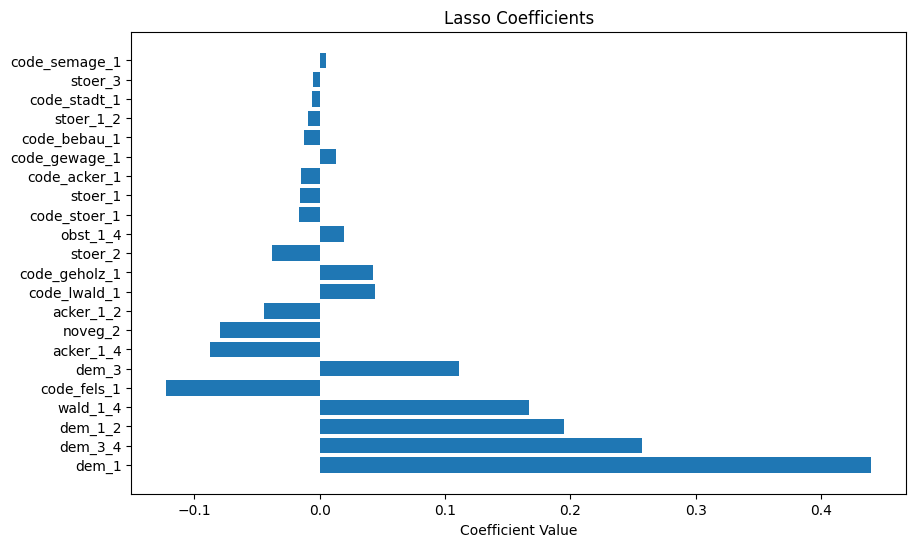

In [17]:
# Extract coefficients and feature names
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]
coefficients = elastic_net.coef_

# Create a DataFrame for easy sorting and filtering
coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
coef_df = coef_df.sort_values(by="Coefficient", ascending=False, key=abs)  # Sort by absolute value of coefficients


# Define threshold for significance (e.g., non-zero or based on a magnitude threshold)
significant_vars = coef_df[coef_df["Coefficient"] != 0]
insignificant_vars = coef_df[coef_df["Coefficient"] == 0]

print("Significant Variables:\n", significant_vars)
print("\nInsignificant Variables:\n", insignificant_vars.Feature.tolist())


# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(significant_vars["Feature"], significant_vars["Coefficient"])
plt.xlabel("Coefficient Value")
plt.title("Lasso Coefficients")
plt.show()


In [18]:
significant_vars.to_csv(model_folder / 'significant_coefs.csv', index=False)


joblib.dump(elastic_net, model_folder / 'model.pkl')


['/h/u145/hofer/MyDocuments/Granular/beauty/data/models/diverse_elastic/model.pkl']